In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime
import copy
%load_ext autoreload
%autoreload 2

In [2]:
%run proj1_helpers.py
%run implementations.py

In [3]:
DATA_TRAIN_PATH = 'train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Spliting the data

In [4]:
ratio_train_test = 0.9
x_train, y_train, x_test, y_test = split_data(tX, y, ratio_train_test, seed=1)

## Cleaning the data
We see that the column 22 can be used to make categories, since the values of some other columns seems to be proportional to the value of this column.

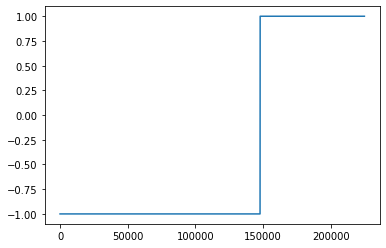

In [5]:
# categorical column
plt.plot(np.sort(y_train))

In [91]:
# preprocessing training dataset
categorical_datasets = preprocessing(copy.deepcopy(y_train),copy.deepcopy(x_train))
y0, x0 = categorical_datasets[0]
y1, x1 = categorical_datasets[1]
y2, x2 = categorical_datasets[2]
columns_to_keep = categorical_datasets[3]
"""
# clean high correlation areas
x0 = np.delete(x0, 6, 1)
x0 = np.delete(x0, 7, 1)
"""


# preprocessing
categorical_datasets_test = preprocessing(_,copy.deepcopy(x_test), train = False, columns_to_keep = columns_to_keep)
x0_test = categorical_datasets_test[0]
x1_test = categorical_datasets_test[1]
x2_test = categorical_datasets_test[2]

rows_to_keep0 = categorical_datasets_test[3]
rows_to_keep1 = categorical_datasets_test[4]
rows_to_keep2 = categorical_datasets_test[5]


y0_test = y_test[np.where(rows_to_keep0)]
y1_test = y_test[np.where(rows_to_keep1)]
y2_test = y_test[np.where(rows_to_keep2)]

"""
# clean high correlation areas
x0_test = np.delete(x0_test, 6, 1)
x0_test = np.delete(x0_test, 7, 1)
"""

'\n# clean high correlation areas\nx0_test = np.delete(x0_test, 6, 1)\nx0_test = np.delete(x0_test, 7, 1)\n'

In [56]:
import pandas as pd
x0_df=pd.DataFrame(data=x0[0:,0:], index=[i for i in range(x0.shape[0])], columns=['f'+str(i) for i in range(x0.shape[1])])
x1_df=pd.DataFrame(data=x1[0:,0:], index=[i for i in range(x1.shape[0])], columns=['f'+str(i) for i in range(x1.shape[1])])
x2_df=pd.DataFrame(data=x2[0:,0:], index=[i for i in range(x2.shape[0])], columns=['f'+str(i) for i in range(x2.shape[1])])

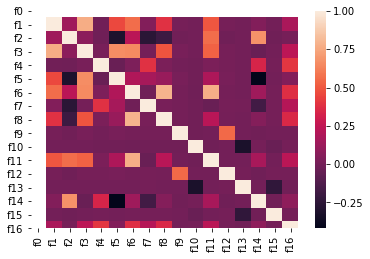

In [57]:
import seaborn as sns
# calculate the correlation matrix
corr = x0_df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

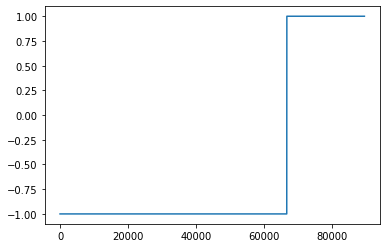

In [11]:
plt.plot(np.sort(y0))

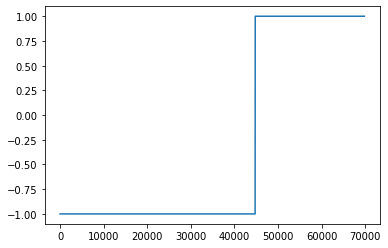

In [12]:
plt.plot(np.sort(y1))

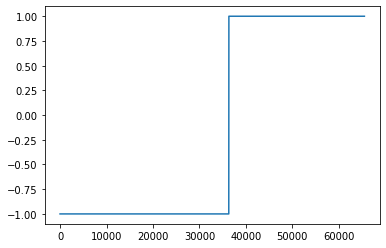

In [13]:
plt.plot(np.sort(y2))

In [58]:
print(x0.shape)
print(x1.shape)
print(x2.shape)

(89647, 17)
(69837, 23)
(65516, 31)


## Grid search on poly degrees and lambdas

In [61]:
%run implementations.py

<Figure size 432x288 with 0 Axes>

In [86]:
## Set hyperparameters
lambdas0 = np.logspace(-6, 0, 20)
lambdas1 = np.logspace(-6, 0, 20)
lambdas2 = np.logspace(-6, 0, 20)

degrees0 = [i for i in range(1,20)]
degrees1 = [i for i in range(1,20)]
degrees2 = [i for i in range(1,20)]

In [87]:
def grid_search_ridge_regression(y_train,x_train,y_test,x_test,lambdas,degrees):
    # define lists to store the loss of training data and test data
    data = []
    for degree in degrees:
        data_nested = []        
        phi_x_train = build_poly(x_train, degree)
        phi_x_test = build_poly(x_test, degree)
        for lambda_ in lambdas:
            w = ridge_regression(y_train,phi_x_train,lambda_)[1]
            y_pred_train = predict_labels(w, phi_x_train)
            acc_train,_ = metrics_check(y_train,y_pred_train)
            y_pred_test = predict_labels(w, phi_x_test)
            acc_test,_ = metrics_check(y_test,y_pred_test)
            data_nested.append([acc_train, acc_test, degree, lambda_, w])
        data_nested = np.array(data_nested)
        index_best_value = np.where(data_nested[:,1] == np.amax(data_nested[:,1]))
        best_value = data_nested[index_best_value][0]
        print("Running :: Training accuracy: ",best_value[0]," ,testing accuracy: ",best_value[1]," ,degree: ",best_value[2]," , lambda : ",best_value[3])
        data.append(best_value)
    data = np.array(data)
    index_best_value = np.where(data[:,1] == np.amax(data[:,1]))
    best_value = data[index_best_value][0]
    print("Final :: Training accuracy: ",best_value[0]," ,testing accuracy: ",best_value[1]," ,degree: ",best_value[2]," , lambda : ",best_value[3])
    
    return best_value[2],best_value[3], best_value[4]

In [92]:
degree0, lambda0, w0 = grid_search_ridge_regression(y0, x0, y0_test, x0_test, lambdas0, degrees0)

Running :: Training accuracy:  0.8400504199805905  ,testing accuracy:  0.8208969815471099  ,degree:  1  , lambda :  1.0
Running :: Training accuracy:  0.8404073755953908  ,testing accuracy:  0.8182084809971893  ,degree:  2  , lambda :  1.0
Running :: Training accuracy:  0.8165359688556226  ,testing accuracy:  0.6310644018086277  ,degree:  3  , lambda :  0.00615848211066026
Running :: Training accuracy:  0.8350641962363492  ,testing accuracy:  0.5470609800806551  ,degree:  4  , lambda :  0.00615848211066026
Running :: Training accuracy:  0.7569243811839772  ,testing accuracy:  0.631113283636808  ,degree:  5  , lambda :  0.0014384498882876629
Running :: Training accuracy:  0.7426907760438163  ,testing accuracy:  0.5611878284247831  ,degree:  6  , lambda :  0.11288378916846883
Running :: Training accuracy:  0.7443082311733801  ,testing accuracy:  0.5588903825003055  ,degree:  7  , lambda :  0.11288378916846883
Running :: Training accuracy:  0.7447990451437304  ,testing accuracy:  0.567395

In [93]:
degree1, lambda1, w1 = grid_search_ridge_regression(y1, x1, y1_test, x1_test, lambdas1, degrees1)

Running :: Training accuracy:  0.7984163122700001  ,testing accuracy:  0.7852946750047375  ,degree:  1  , lambda :  1.0
Running :: Training accuracy:  0.8031845583286796  ,testing accuracy:  0.7864001010675258  ,degree:  2  , lambda :  1.0
Running :: Training accuracy:  0.8041152970488423  ,testing accuracy:  0.7858000126334407  ,degree:  3  , lambda :  1.0
Running :: Training accuracy:  0.8039291493048097  ,testing accuracy:  0.7887057039984839  ,degree:  4  , lambda :  1.0
Running :: Training accuracy:  0.8054183312570701  ,testing accuracy:  0.7400353736340092  ,degree:  5  , lambda :  1.0
Running :: Training accuracy:  0.7122012686684709  ,testing accuracy:  0.5517655233402817  ,degree:  6  , lambda :  7.847599703514606e-05
Running :: Training accuracy:  0.5604622191674901  ,testing accuracy:  0.5410586823321332  ,degree:  7  , lambda :  2.06913808111479e-06
Running :: Training accuracy:  0.5950427423858413  ,testing accuracy:  0.5401111742783147  ,degree:  8  , lambda :  0.2335721

In [94]:
degree2, lambda2, w2 = grid_search_ridge_regression(y2, x2, y2_test, x2_test, lambdas2, degrees2)

Running :: Training accuracy:  0.8375053422064839  ,testing accuracy:  0.8251538958609665  ,degree:  1  , lambda :  1.0
Running :: Training accuracy:  0.8389858965748824  ,testing accuracy:  0.8282828282828283  ,degree:  2  , lambda :  1.0
Running :: Training accuracy:  0.8390316869161731  ,testing accuracy:  0.8291330816583342  ,degree:  3  , lambda :  1.0
Running :: Training accuracy:  0.8391690579400451  ,testing accuracy:  0.8278747066625854  ,degree:  4  , lambda :  1.0
Running :: Training accuracy:  0.8410159350387691  ,testing accuracy:  0.8312076998945686  ,degree:  5  , lambda :  1.0
Running :: Training accuracy:  0.8421606935710361  ,testing accuracy:  0.8079787776757473  ,degree:  6  , lambda :  1.0
Running :: Training accuracy:  0.8445723182123451  ,testing accuracy:  0.7358432812978267  ,degree:  7  , lambda :  1.0
Running :: Training accuracy:  0.8462665608401001  ,testing accuracy:  0.8369894228480087  ,degree:  8  , lambda :  1.0
Running :: Training accuracy:  0.4234385

## Computing the weights with the results from the grid search

In [74]:
#degree0 = 17
#lambda0 = 1e-6

#degree0 = int(degree0)
phi_x0 = build_poly(x0, degree0)

#w0 = ridge_regression(y0, phi_x0, lambda0)[1]

cat_accuracy_train, f1_score_train = metrics(w0,y0,phi_x0)
print("Categorical accuracy train : ",cat_accuracy_train," || f1_score train: ",f1_score_train)
cat_accuracy_test, f1_score_test = metrics(w0,y0,phi_x0)
print("Categorical accuracy train : ",cat_accuracy_train," || f1_score train: ",f1_score_train)

Categorical accuracy train :  0.4843441498321193  || f1_score train:  0.21013856167392087


In [215]:
degree1 = 5.0
lambda1 = 0.05455594781168514

degree1 = int(degree1)
phi_x1 = build_poly(x1, degree1)

w1 = ridge_regression(y1, phi_x1, lambda1)[1]

cat_accuracy_train, f1_score_train = metrics(w1,y1,phi_x1)
print("Categorical accuracy train : ",cat_accuracy_train," || f1_score train: ",f1_score_train)

Categorical accuracy train :  0.8049887595400719  || f1_score train:  0.39621081639683087


In [216]:
degree2 = 8.0
lambda2 = 0.0014384498882876629

degree2 = int(degree2)
phi_x2 = build_poly(x2, degree2)

w2 = ridge_regression(y2, phi_x2, lambda2)[1]

cat_accuracy_train, f1_score_train = metrics(w2,y2,phi_x2)
print("Categorical accuracy train : ",cat_accuracy_train," || f1_score train: ",f1_score_train)

Categorical accuracy train :  0.8463581415226815  || f1_score train:  0.5370178082956512


## Test on the validate dataset

In [95]:
# Build poly features
phi_x0_test = build_poly(copy.deepcopy(x0_test), degree0)
phi_x1_test = build_poly(copy.deepcopy(x1_test), degree1)
phi_x2_test = build_poly(copy.deepcopy(x2_test), degree2)

# Predict outcomes
y_pred0 = predict_labels(w0, phi_x0_test)
y_pred1 = predict_labels(w1, phi_x1_test)
y_pred2 = predict_labels(w2, phi_x2_test)

total_length = y_pred0.shape[0] + y_pred1.shape[0] + y_pred2.shape[0]
y_pred = np.zeros((total_length,))
y_pred[np.where(rows_to_keep0)] = y_pred0
y_pred[np.where(rows_to_keep1)] = y_pred1
y_pred[np.where(rows_to_keep2)] = y_pred2


In [96]:
y_pred.shape

(101980,)

In [97]:
cat_accuracy_test, f1_score_test = metrics_check(y_test,y_pred)
print("Categorical accuracy train : ",cat_accuracy_test," || f1_score train: ",f1_score_test)

Categorical accuracy train :  0.8155422631888606  || f1_score train:  0.36656896192718597


## Generate predictions and save ouput in csv format for submission:

In [98]:
DATA_TEST_PATH = 'test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [187]:
test_df=pd.DataFrame(data=tX_test[0:,0:], index=[i for i in range(tX_test.shape[0])], columns=['f'+str(i) for i in range(tX_test.shape[1])])
test_df.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29
count,568238.000000,568238.000000,568238.000000,568238.000000,568238.000000,568238.000000,568238.000000,568238.000000,568238.00000,568238.000000,...,568238.000000,568238.000000,568238.000000,568238.000000,568238.000000,568238.000000,568238.000000,568238.000000,568238.000000,568238.000000
mean,-48.729241,49.258387,81.122338,57.829094,-707.441800,-599.731058,-708.384205,2.374211,18.99262,158.668286,...,-0.007981,209.957809,0.980251,-348.946261,-399.886426,-399.899229,-691.293904,-708.143299,-708.146201,73.267629
std,406.018702,35.393465,40.474035,63.304450,454.931763,659.054554,453.464437,0.779978,21.76045,116.258246,...,1.812916,126.956060,0.979394,533.156405,489.468578,489.458204,480.450337,453.837535,453.832741,98.470522
min,-999.000000,0.000000,6.810000,0.000000,-999.000000,-999.000000,-999.000000,0.237000,0.00000,46.103000,...,-3.142000,13.847000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,78.191000,19.330000,59.425000,14.202250,-999.000000,-999.000000,-999.000000,1.815000,2.83800,77.463000,...,-1.574000,122.972250,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,105.080000,46.467000,73.740000,38.472000,-999.000000,-999.000000,-999.000000,2.492000,12.41300,120.666000,...,-0.016000,179.940000,1.000000,38.968000,-1.862000,-2.110000,-999.000000,-999.000000,-999.000000,40.504000
75%,130.775500,73.630000,92.162750,79.256000,0.503000,84.305500,-4.532000,2.962000,27.65100,201.073000,...,1.559000,264.024750,2.000000,75.520000,0.431000,0.483000,33.838000,-2.427000,-2.260000,110.566500
max,1949.261000,968.669000,1264.965000,1337.187000,8.724000,4794.827000,17.650000,5.751000,759.36300,2079.162000,...,3.142000,2190.275000,3.000000,1163.439000,4.500000,3.142000,817.801000,4.500000,3.142000,1860.175000


In [188]:
train_df=pd.DataFrame(data=tX[0:,0:], index=[i for i in range(tX.shape[0])], columns=['f'+str(i) for i in range(tX.shape[1])])
train_df.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,...,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591
std,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,...,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662
min,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,...,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,...,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,...,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500
75%,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,...,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750
max,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,...,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


In [99]:
# preprocessing
categorical_datasets_test = preprocessing(_,copy.deepcopy(tX_test), train = False, columns_to_keep = columns_to_keep)
x0_validate = categorical_datasets_test[0]
x1_validate = categorical_datasets_test[1]
x2_validate = categorical_datasets_test[2]
rows_to_keep_validate0 = categorical_datasets_test[3]
rows_to_keep_validate1 = categorical_datasets_test[4]
rows_to_keep_validate2 = categorical_datasets_test[5]

In [100]:
print(x0_validate.shape)
print(x1_validate.shape)
print(x2_validate.shape)

(227458, 19)
(175338, 23)
(165442, 31)


In [101]:
# Build poly features
phi_x0_validate = build_poly(copy.deepcopy(x0_validate), degree0)
phi_x1_validate = build_poly(copy.deepcopy(x1_validate), degree1)
phi_x2_validate = build_poly(copy.deepcopy(x2_validate), degree2)

In [102]:
# Predict outcomes
y_pred0 = predict_labels(w0, phi_x0_validate)
y_pred1 = predict_labels(w1, phi_x1_validate)
y_pred2 = predict_labels(w2, phi_x2_validate)

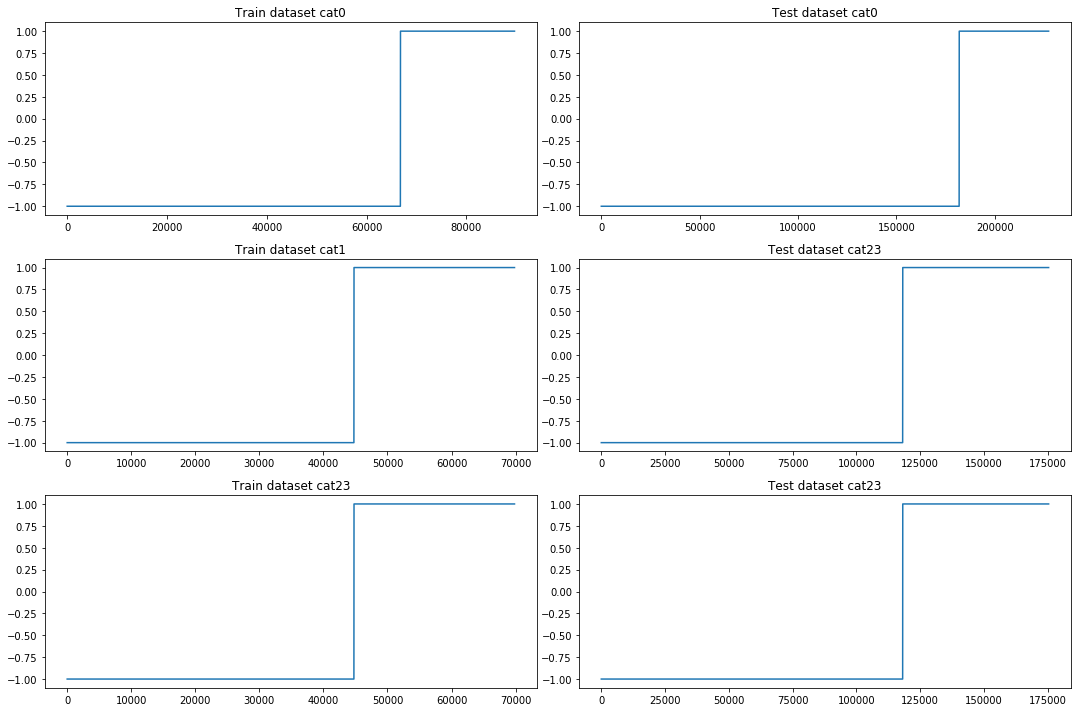

In [103]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

# Cat 0
ax1.plot(np.sort(y0))
ax1.title.set_text("Train dataset cat0")
ax2.plot(np.sort(y_pred0))
ax2.title.set_text("Test dataset cat0")

# Cat 1
ax3.plot(np.sort(y1))
ax3.title.set_text("Train dataset cat1")
ax4.plot(np.sort(y_pred1))
ax4.title.set_text("Test dataset cat23")

# Cat 2 and 3
ax5.plot(np.sort(y1))
ax5.title.set_text("Train dataset cat23")
ax6.plot(np.sort(y_pred1))
ax6.title.set_text("Test dataset cat23")

plt.tight_layout()  # Optional ... often improves the layout 

In [104]:
total_length = y_pred0.shape[0] + y_pred1.shape[0] + y_pred2.shape[0]
y_pred = np.zeros((total_length,))
y_pred[np.where(rows_to_keep_validate0)] = y_pred0
y_pred[np.where(rows_to_keep_validate1)] = y_pred1
y_pred[np.where(rows_to_keep_validate2)] = y_pred2

In [105]:
total_length

568238

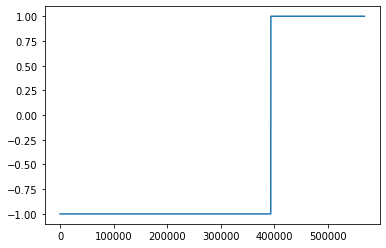

In [106]:
plt.plot(np.sort(y_pred))

In [107]:
time_day = datetime.datetime.now().day
time_hour = datetime.datetime.now().hour
time_min = datetime.datetime.now().minute
time_second = datetime.datetime.now().second

time = str(time_day)+"-"+str(time_hour)+"-"+str(time_min)+"-"+str(time_second)

OUTPUT_PATH = 'submission'+"_"+str(time)+".csv"
#print(weights_LS.shape)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)